# Statistical Methods in Data Science:
## Assignment - 1:

## Group Members:
## Talal Atiq - FA22-BDS-041
## Abdullah Rizwan - FA22-BDS-003
## M. Nouman - FA22-BDS-028

*Importing dataset and the necessary libraries.*


**Dataset Name: Life Expectancy**

**Source: World Health Organization**

**Duration: 2000-2015**

In [3]:
import pandas as pd
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


# Talal's Notebook:
# [FA22-BDS-041]

**Q-1: Show the average expected life over the past years of all countries?**

In [6]:
df.groupby(['Country'])['Life_expectancy'].mean()

Country
Afghanistan            59.65625
Albania                75.95000
Algeria                73.78750
Angola                 52.82500
Antigua and Barbuda    75.35000
                         ...   
Venezuela, RB          72.79375
Vietnam                74.33125
Yemen, Rep.            64.16250
Zambia                 52.33125
Zimbabwe               48.66250
Name: Life_expectancy, Length: 179, dtype: float64

**Q-2: Find the country with the highest average age over the past few years and the country with the lowest as well?**

In [7]:
mean_life_expectancy = df.groupby(['Country'])['Life_expectancy'].mean()
talal_highest_life_expectancy = mean_life_expectancy.sort_values(ascending = False)

In [8]:
talal_highest_life_expectancy[0:1]

Country
Japan    82.45625
Name: Life_expectancy, dtype: float64

**Q-3: Find the country with the lowest average life expectancy?**

In [9]:
talal_lowest_life_expectancy = mean_life_expectancy.sort_values(ascending = True)
talal_lowest_life_expectancy[0:1]

Country
Lesotho    45.60625
Name: Life_expectancy, dtype: float64

**Q-4: Which regions have a comparatively higher expected life?**

In [10]:
regional = df.groupby(['Region'])['Life_expectancy'].mean()
talal_regional_sorted = regional.sort_values(ascending = False)
talal_regional_sorted[0:3]

Region
North America     77.841667
European Union    77.715046
Rest of Europe    74.525417
Name: Life_expectancy, dtype: float64

**Q-5: Does the economic status of a country play a role in the average life expectancy of the people?**

In [11]:
df.groupby(['Economy_status_Developed'])['Life_expectancy'].mean()

Economy_status_Developed
0    66.341725
1    78.505743
Name: Life_expectancy, dtype: float64

The Answer is 'Yes' as the countries which are economically developed i.e Economy status = 1 have higher life expectancy

**Q-6: Which region has the least polio cases and does that have any effect on the average life of people?**

In [12]:
talal_least_poliocases = df.groupby(['Region'])[['Polio', 'Life_expectancy']].mean()
talal_least_poliocases

,Polio,Life_expectancy
Region,,
Africa,76.205882,57.847304
Asia,88.194444,69.454861
Central America and Caribbean,91.049342,72.437500
European Union,95.530093,77.715046
Middle East,90.022321,73.975446
North America,92.854167,77.841667
Oceania,81.829545,69.517614
Rest of Europe,92.954167,74.525417
South America,89.427083,72.780729


**Q-7: List the top 5 contries with the most stable economy?**

In [13]:
talal_stable_economies = df.groupby(['Country'])['GDP_per_capita'].agg(['mean', 'std'])
talal_stable_economies.sort_values(['std'], ascending = False)

,mean,std
Country,,
United Arab Emirates,45530.8750,10797.108773
Singapore,44656.6250,7377.056006
Luxembourg,102972.6875,5524.839928
Ireland,47788.6875,4632.477159
"Venezuela, RB",9294.8750,4614.676903
...,...,...
Comoros,1204.2500,30.727838
Niger,432.6875,28.198626
Madagascar,472.8750,20.619974


**Q-8: Provide us with a yearly analysis on the life expectancy based on region?**

In [14]:
talal_yearly_analysis = df.groupby(['Year'])['Life_expectancy'].agg(['mean', 'median', 'std', 'max', 'min'])
talal_yearly_analysis

,mean,median,std,max,min
Year,,,,,
2000,66.360335,69.7,10.179608,81.1,39.4
2001,66.650279,69.9,10.204413,81.4,40.4
2002,66.886592,70.2,10.148086,81.6,41.4
2003,67.170391,70.4,10.067227,81.8,42.4
2004,67.549721,70.9,10.022460,82.0,42.7
2005,67.856425,71.2,9.874027,81.9,42.5
2006,68.221788,71.0,9.704599,82.3,42.6
2007,68.588268,71.2,9.496417,82.5,42.9
2008,68.991061,71.6,9.281710,82.6,43.4


The increase in the mean over the years may indicate that the with the development in field of medical the average life expectancy was increased

**Q-9: Determine wheather the Alcohol Consumption of coutries play a part in their average life expectancy or not?**

Corelation Coeffiecent:

In [15]:
talal_correlation = df['Alcohol_consumption'].corr(df['Life_expectancy'])
print(talal_correlation)
print("The correlation coefficient of 0.399 suggests a moderate positive relationship between alcohol consumption and life expectancy")

0.3991591075791727
The correlation coefficient of 0.399 suggests a moderate positive relationship between alcohol consumption and life expectancy


**Q-10: Determine wheather a being polio free or not plays a part in life expectancy?**

In [16]:
talal_polio_relation = df.groupby(['Country'])
talal_polio_relation = df['Life_expectancy'].corr(df['Polio'])
print(talal_polio_relation)

0.6412174553454272


**Q-11: Which countries have most sustainable population growth over the years?**

In [17]:
talal_sustainable_population = df.groupby(['Country'])['Population_mln'].std()
talal_sustainable_population.sort_values(ascending = True)[0:5]

Country
St. Vincent and the Grenadines    0.000000
Tonga                             0.000000
Micronesia, Fed. Sts.             0.005000
Grenada                           0.005123
Seychelles                        0.005123
Name: Population_mln, dtype: float64

**Q-12: Does the factor that the country is economically developed or not play a role in Polio cases in that country?**

In [18]:
df.groupby(['Economy_status_Developed'])['Polio'].mean()

Economy_status_Developed
0    84.319542
1    94.866554
Name: Polio, dtype: float64

The answer is 'Yes' as the countires which are economically developed have higher average percentage of being polio-free.

**Q-13: Visually demonstrate the average life expectancy in different reigons?**

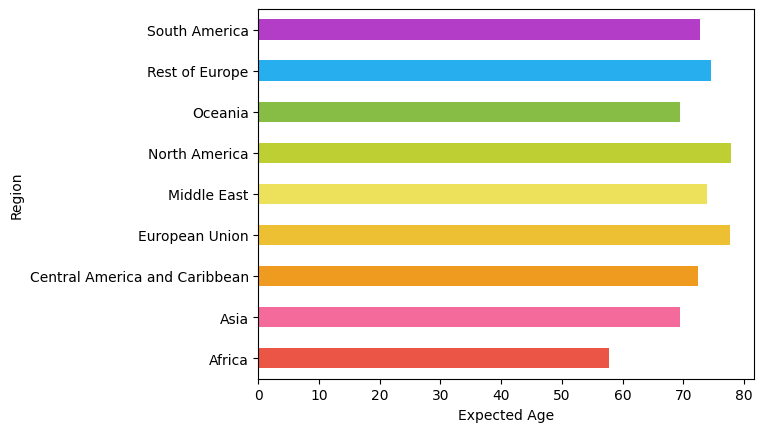

In [19]:
talal_line_plot = df.groupby(['Region'])['Life_expectancy'].mean()
custom_colors = ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"]
talal_line_plot.plot(kind='barh', x='Country', y='Life_expectancy', color=custom_colors)
plt.xlabel('Expected Age')
plt.ylabel('Region')
plt.show()

**Q-14: Visually describe the decline in deaths of infants in Pakistan over the years?**

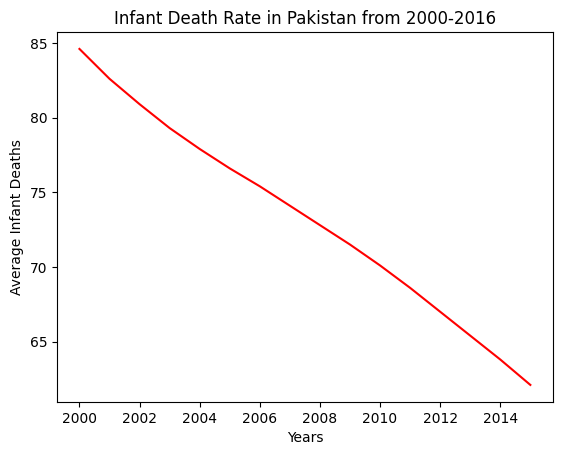

In [20]:
talal_pk_df = df[df['Country'] == 'Pakistan']
talal_pk_df = talal_pk_df.groupby(['Year'])['Infant_deaths'].mean()
talal_pk_df.plot(kind = 'line', x = 'Year', y = 'Infant_deaths', color = 'red')
plt.xlabel('Years')
plt.ylabel('Average Infant Deaths')
plt.title('Infant Death Rate in Pakistan from 2000-2016')
plt.show()

**Q-15: Compare the infant death rate across different regions?**

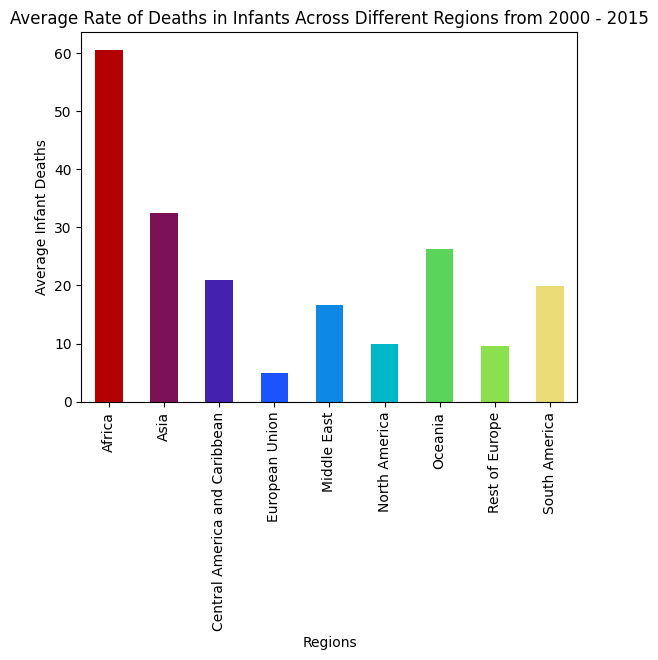

In [21]:
talal_region_df = df.groupby(['Region'])['Infant_deaths'].mean()
colors = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]
talal_region_df.plot(kind = 'bar', color = colors)
plt.xlabel('Regions')
plt.ylabel('Average Infant Deaths')
plt.title('Average Rate of Deaths in Infants Across Different Regions from 2000 - 2015')
plt.show()

**Q-16: Show the global contribution of GDP with respect to regions?**

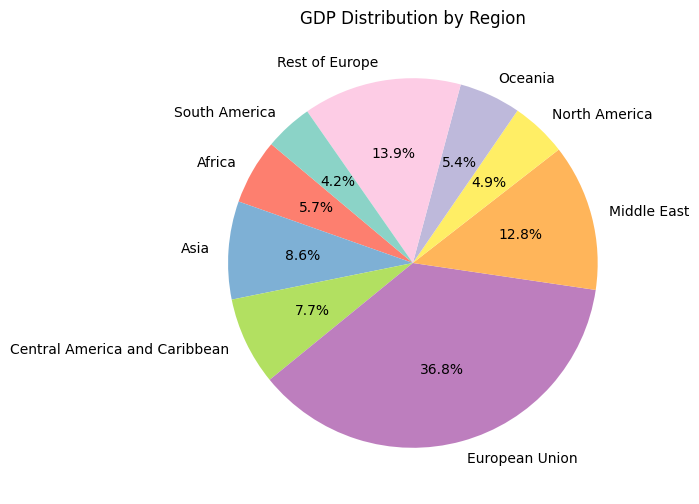

In [22]:
talal_gdp_df = df.groupby(['Region'])['GDP_per_capita'].sum()
plt.figure(figsize=(8, 6))
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
plt.pie(talal_gdp_df, labels=talal_gdp_df.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('GDP Distribution by Region')
plt.show()

**Q-17: Does the fact that the country is economically developed or not play a role in deaths under the age of five?**

In [23]:
df.groupby(['Economy_status_Developed'])['Under_five_deaths'].mean()

Economy_status_Developed
0    52.654269
1     5.649831
Name: Under_five_deaths, dtype: float64

The answer according to data is a big 'Yes' as the countries that are economically developed have significantly less number of deaths under the age of five which may be translated to availability of better medical services in developed countries.

**Q-18: Does a better BMI mirrors a longer expected life?**

In [24]:
bmi_df = df.groupby(['Country'])[['BMI', 'Life_expectancy']].mean()
corr = bmi_df['BMI'].corr(bmi_df['Life_expectancy'])
print(corr)

0.5944032307289089


This value indicates that BMI has a moderately positive relation with the life expectancy. Better the BMI vales, better is the life expectancy and vice versa.

# Abdullah Rizwan's Notebook:
# [FA22-BDS-003]

In [24]:
data = pd.read_csv('Life-Expectancy-Data-Updated.csv')
AR_DF = pd.DataFrame(data)
AR_DF

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


**Q-19: Which region has the highest average GDP per capita?**

In [26]:
abdullah_GDP_per_capita = AR_DF.groupby(['Region'])['GDP_per_capita'].mean()
abdullah_GDP_per_capita = abdullah_GDP_per_capita.sort_values(ascending = False)
abdullah_GDP_per_capita[0:1]

Region
North America    33783.854167
Name: GDP_per_capita, dtype: float64

**Q-20: Give me the worst 10 countries and their life expectancy based on whether the country is polio-free or not.**

In [27]:
abdullah_polio_df = AR_DF.groupby(['Country'])[['Polio', 'Life_expectancy']].mean()
abdullah_polio_df = abdullah_polio_df.sort_values(['Polio','Life_expectancy'],  ascending = [1, 1])
abdullah_polio_df.iloc[0:10]

,Polio,Life_expectancy
Country,,
Angola,35.7500,52.82500
Chad,38.5000,49.94375
Somalia,40.5000,53.24375
Central African Republic,44.0000,46.48125
Nigeria,45.6250,49.58125
Equatorial Guinea,51.7500,55.13125
Guinea,54.8125,55.10625
Afghanistan,55.3750,59.65625
Niger,57.4375,55.36875


**Q-21: Which regions have the highest incidents of HIV and what are their average life expectancy?**

In [28]:
abdullah_hiv_df = AR_DF.groupby(['Region'])['Incidents_HIV'].mean()
abdullah_hiv_df.sort_values(ascending = False)

Region
Africa                           2.702132
Central America and Caribbean    0.419375
South America                    0.298333
Oceania                          0.155284
Asia                             0.139884
North America                    0.127917
Rest of Europe                   0.107292
Middle East                      0.089063
European Union                   0.073912
Name: Incidents_HIV, dtype: float64

**Q-22: Give me the top 10 countries and their life expectancy based on whether the country is polio-free or not.**

In [29]:
abdullah_polio_df1 = abdullah_polio_df.sort_values(['Polio','Life_expectancy'],  ascending = [0, 0])
abdullah_polio_df1.iloc[0:10]

,Polio,Life_expectancy
Country,,
Hungary,98.9375,73.64375
Cuba,98.6875,77.89375
Uzbekistan,98.5625,69.03750
Oman,98.5000,74.80625
Seychelles,98.5000,72.83750
Slovak Republic,98.4375,74.78750
Sri Lanka,98.3750,74.68750
Thailand,98.3125,73.20000
Brazil,98.3125,72.69375


**Q-23: Is Life Expectancy dependent on Diphtheria?**

In [30]:
abdullah_diphtheria = AR_DF['Life_expectancy'].corr(AR_DF['Diphtheria'])
abdullah_diphtheria

0.6275413923742558

This correlation coefficient shows that Life Expectancy is strongly dependent on Diphtheria

**Q-24: Is Life Expectancy dependent on Schooling?**

In [31]:
abdullah_schooling = AR_DF['Schooling'].corr(AR_DF['Life_expectancy'])
abdullah_schooling

0.7324844688915007

**Q-25: Is Life Expectancy dependent on Measles?**

In [32]:
abdullah_measles = AR_DF['Life_expectancy'].corr(AR_DF['Measles'])
abdullah_measles

0.4900185894094421

This shows a Strong Correlation between measles and liFe expectancy

**Q-26: Is there a significant difference in measles incidents among countries with high vs. low GDP per capita?**

In [33]:
abdullah_gdp = AR_DF['GDP_per_capita'].corr(AR_DF['Measles'])
abdullah_gdp

0.3137237175006622

**Q-27: Is there a correlation between life expectancy and population size?**

In [34]:
abdullah_pop = AR_DF['Life_expectancy'].corr(AR_DF['Population_mln'])
abdullah_pop

0.026297879724181548

This Shows that population size is not important in determining life expectancy

**Q-28: Which country has the most average schooling years?**

In [35]:
abdullah_literacy = AR_DF.groupby(['Country'])['Schooling'].mean()
abdullah_literacy = abdullah_literacy.sort_values(ascending = False)
abdullah_literacy[0:1]

Country
Germany    13.26875
Name: Schooling, dtype: float64

**Q-29: Are there noticeable differences in thinness among teenagers (ten to nineteen years) across regions?**

In [36]:
abdullah_thinness = AR_DF.groupby(['Region'])['Thinness_ten_nineteen_years'].agg(['std'])
abdullah_thinness

,std
Region,
Africa,2.734183
Asia,7.162460
Central America and Caribbean,1.414813
European Union,0.758527
Middle East,2.779084
North America,0.545090
Oceania,3.124898
Rest of Europe,0.827943
South America,1.321382


This shows that Asia has the highest variability in thinness among teenagers

**Q-30: How does measles incidence vary within Pakistan over the years?**

In [37]:
abdullah_measle = AR_DF[AR_DF['Country']=='Pakistan']
abdullah_measle = abdullah_measle.groupby(['Year'])['Measles'].mean()
abdullah_measle

Year
2000    33.0
2001    33.0
2002    33.0
2003    33.0
2004    33.0
2005    33.0
2006    32.0
2007    33.0
2008    34.0
2009    30.0
2010    34.0
2011    38.0
2012    42.0
2013    43.0
2014    48.0
2015    54.0
Name: Measles, dtype: float64

**Q-31: Which region has the highest average adult mortality rate?**

In [38]:
abdullah_mortality_rate = AR_DF.groupby(['Region'])['Adult_mortality'].mean()
abdullah_mortality_rate

Region
Africa                           319.073434
Asia                             171.166565
Central America and Caribbean    163.581169
European Union                   104.395392
Middle East                      111.158891
North America                    100.693844
Oceania                          162.886801
Rest of Europe                   138.582856
South America                    155.275326
Name: Adult_mortality, dtype: float64

**Q-32: What is the average GDP per capita in South American countries?**

In [39]:
abdullah_GDP = AR_DF[AR_DF['Region']=='South America']
abdullah_GDP = abdullah_GDP.groupby(['Country'])['GDP_per_capita'].mean()
abdullah_GDP

Country
Argentina        12169.1250
Bolivia           2414.3750
Brazil            7991.5000
Chile            11067.0000
Colombia          4911.0625
Ecuador           5176.9375
Guyana            4589.6875
Paraguay          4402.6250
Peru              4626.1875
Suriname          8133.3750
Uruguay          12007.6250
Venezuela, RB     9294.8750
Name: GDP_per_capita, dtype: float64

**Q-33: How does the prevalence of measles vary between 2000 and 2015 in Middle Eastern countries?**

In [40]:
abdullah_Measles_occurance = AR_DF[AR_DF['Region']=='Middle East']
abdullah_Measles_occurance = abdullah_Measles_occurance.groupby(['Year'])['Measles'].mean()
abdullah_Measles_occurance

Year
2000    81.785714
2001    82.142857
2002    80.714286
2003    79.928571
2004    81.142857
2005    82.000000
2006    82.571429
2007    84.142857
2008    85.285714
2009    88.071429
2010    87.928571
2011    86.571429
2012    84.928571
2013    84.571429
2014    83.857143
2015    84.500000
Name: Measles, dtype: float64

**Q-34: Is there a correlation between schooling attainment and alcohol consumption?**

In [41]:
abdullah_Alcohol_Consumption = AR_DF['Schooling'].corr(AR_DF['Alcohol_consumption'])
abdullah_Alcohol_Consumption

0.6157280402871451

Yes there is a strong correlation between schooling and alcohol consumption

**Q-35: How does HIV incidence compare between South American and Asian countries?**

In [42]:
abdullah_south_american_countries = AR_DF[AR_DF['Region'] == 'South America']
asian_countries = AR_DF[AR_DF['Region'] == 'Asia']
mean_hiv_incidence_south_america = abdullah_south_american_countries['Incidents_HIV'].mean()
mean_hiv_incidence_asia = asian_countries['Incidents_HIV'].mean()
print("Mean HIV incidence in South American countries:", mean_hiv_incidence_south_america)
print("Mean HIV incidence in Asian countries:", mean_hiv_incidence_asia)

Mean HIV incidence in South American countries: 0.29833333333333334
Mean HIV incidence in Asian countries: 0.13988425925925926


This shows that HIV incidences occur more in South American countries

**Q-36: Is there a correlation between thinness among children aged five to nine years and hepatitis B vaccination coverage?**

In [43]:
abdullah_Thinness_Relation = AR_DF['Hepatitis_B'].corr(AR_DF['Thinness_five_nine_years'])
abdullah_Thinness_Relation

-0.21379442412915

This shows weak correlation which means these to do not depend on each other

**Q-37: Is there a trend in diphtheria vaccination coverage over time?**

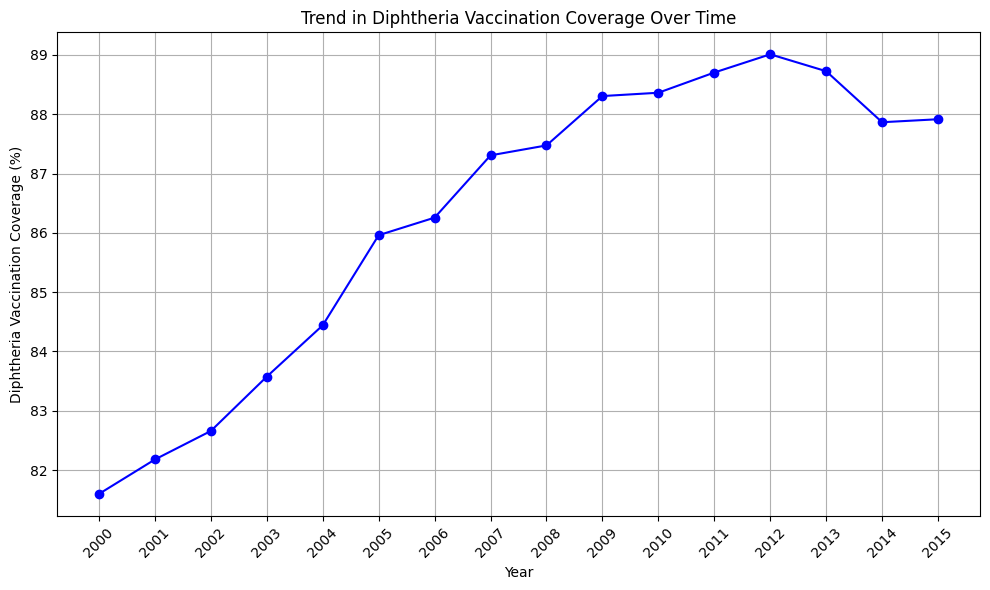

In [44]:
abdullah_mean_diphtheria_coverage_by_year = AR_DF.groupby('Year')['Diphtheria'].mean()
plt.figure(figsize=(10, 6))
abdullah_mean_diphtheria_coverage_by_year.plot(kind='line', marker='o', color='b')
plt.title('Trend in Diphtheria Vaccination Coverage Over Time')
plt.xlabel('Year')
plt.ylabel('Diphtheria Vaccination Coverage (%)')
plt.grid(True)
plt.xticks(abdullah_mean_diphtheria_coverage_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

# Nouman's Notebook:
# [FA22-BDS-028]

**Q-38: Average life expectancy across all countries:**

In [45]:
nomi_df=pd.read_csv('Life-Expectancy-Data-Updated.csv')


In [46]:
average_life_expectancy = nomi_df['Life_expectancy'].mean()
average_life_expectancy

68.85607541899441

**Q-39: Country with the highest infant mortality rate?**

In [47]:
country_highest_infant_mortality = nomi_df.loc[nomi_df['Infant_deaths'].idxmax()]
country_highest_infant_mortality


Country                        Sierra Leone
Region                               Africa
Year                                   2000
Infant_deaths                         138.1
Under_five_deaths                     224.9
Adult_mortality                    531.3245
Alcohol_consumption                    3.75
Hepatitis_B                              71
Measles                                  60
BMI                                    22.0
Polio                                    46
Diphtheria                               44
Incidents_HIV                          1.59
GDP_per_capita                          403
Population_mln                         4.58
Thinness_ten_nineteen_years             1.3
Thinness_five_nine_years                1.4
Schooling                               2.3
Economy_status_Developed                  0
Economy_status_Developing                 1
Life_expectancy                        39.4
Name: 1417, dtype: object

**Q-40: Correlation between GDP per capita and life expectancy:**

In [48]:
nomi_correlation_gdp_life_expectancy = nomi_df['GDP_per_capita'].corr(nomi_df['Life_expectancy'])
nomi_correlation_gdp_life_expectancy 


0.5830897215324402

**Q-41: Outliers in adult mortality rates (using Z-score):**

In [49]:
from scipy.stats import zscore

nomi_df['Adult_mortality_Z'] = zscore(nomi_df['Adult_mortality'])
outliers_adult_mortality =nomi_df[(nomi_df['Adult_mortality_Z'] > 3) | (nomi_df['Adult_mortality_Z'] < -3)]
nomi_df['Adult_mortality_Z']


0      -0.752264
1      -1.169371
2       0.076810
3       0.260638
4      -1.168949
          ...   
2859    0.866673
2860    0.374107
2861   -0.499231
2862    0.102361
2863   -1.233154
Name: Adult_mortality_Z, Length: 2864, dtype: float64

**Q-42: Correlation between alcohol consumption and adult mortality rates:**

In [50]:
nomi_correlation_alcohol_adult_mortality = nomi_df['Alcohol_consumption'].corr(nomi_df['Adult_mortality'])
nomi_correlation_alcohol_adult_mortality

-0.24479375552647073

**Q-43: Difference in hepatitis B immunization rates between regions?**

In [51]:
nomi_hepatitis_immunization_by_region = nomi_df.groupby('Region')['Hepatitis_B'].mean()
nomi_hepatitis_immunization_by_region

Region
Africa                           78.025735
Asia                             84.402778
Central America and Caribbean    89.980263
European Union                   89.208333
Middle East                      88.415179
North America                    73.291667
Oceania                          80.664773
Rest of Europe                   87.366667
South America                    88.036458
Name: Hepatitis_B, dtype: float64

**Q-44: Check for duplicate country and year combinations**

In [53]:
nomi_duplicates = nomi_df.duplicated(subset=['Country', 'Year'], keep=False)
nomi_duplicates = nomi_df[nomi_duplicates]
nomi_duplicates

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Adult_mortality_Z


**Q-45: Number of countries with a 'Developed' economy status:**

In [54]:
num_developed_countries = nomi_df[nomi_df['Economy_status_Developed'] == 1].shape[0]
num_developed_countries

592

**Q-46: Correlation between GDP per capita and infant deaths**

In [55]:
nomi_correlation_gdp_infant_deaths = nomi_df['GDP_per_capita'].corr(nomi_df['Infant_deaths'])
nomi_correlation_gdp_infant_deaths

-0.5122861147812175

**Q-47: Check the correlation between thinness in teenagers and economic status**

In [56]:
nomi_correlation = nomi_df[['Thinness_ten_nineteen_years', 'Economy_status_Developed', 'Economy_status_Developing']].corr()
nomi_correlation

,Thinness_ten_nineteen_years,Economy_status_Developed,Economy_status_Developing
Thinness_ten_nineteen_years,1.000000,-0.416098,0.416098
Economy_status_Developed,-0.416098,1.000000,-1.000000
Economy_status_Developing,0.416098,-1.000000,1.000000


**Q-48: Calculate the average schooling years for countries with a life expectancy of over 80?**

In [57]:
nomi_average_schooling_years = nomi_df[nomi_df['Life_expectancy'] > 80]['Schooling'].mean()
nomi_average_schooling_years

11.583805668016193

**Q-49: How many countries have a GDP per capita over $20,000 and what is their average life expectancy?**

In [58]:
nomi_high_gdp_countries = nomi_df[nomi_df['GDP_per_capita'] > 20000]
num_high_gdp_countries = len(nomi_high_gdp_countries)
num_high_gdp_countries

515

**Q-50: GDP per capita over $20,000  their average life expectancy?**

In [61]:
average_life_expectancy_high_gdp = nomi_high_gdp_countries['Life_expectancy'].mean()
average_life_expectancy_high_gdp

79.17320388349513

**Q-51: What is the average life expectancy for countries with a developed economy status?**

In [62]:
nomi_average_life_expectancy_developed = nomi_df[nomi_df['Economy_status_Developed'] == 1]['Life_expectancy'].mean()
nomi_average_life_expectancy_developed

78.50574324324323

**Q-52: Which country has the lowest incidence of HIV and what is the incidence rate?**

In [63]:
nomi_lowest_hiv_country = nomi_df.loc[nomi_df['Incidents_HIV'].idxmin()]['Country']
lowest_hiv_rate = nomi_df['Incidents_HIV'].min()
nomi_lowest_hiv_country

'Philippines'

In [64]:
lowest_hiv_rate

0.01

**Q-53: Does higher schooling correlate with lower under-five death rates?**

In [65]:
nomi_correlation_schooling_under_five = nomi_df[['Schooling', 'Under_five_deaths']].corr().iloc[0, 1]
nomi_correlation_schooling_under_five 

-0.7731959826091407

**Q-54: What is the average adult mortality for the European Union countries in the dataset?**

In [66]:
nomi_average_adult_mortality_eu = nomi_df[nomi_df['Region'] == 'European Union']['Adult_mortality'].mean()
nomi_average_adult_mortality_eu

104.3953923611111

**Q-55: Which region has the highest average alcohol consumption and what is the consumption rate?**

In [67]:
nomi_region_alcohol_consumption = nomi_df.groupby('Region')['Alcohol_consumption'].mean().idxmax()
max_alcohol_consumption = nomi_df.groupby('Region')['Alcohol_consumption'].mean().max()
nomi_region_alcohol_consumption

'European Union'

In [68]:
max_alcohol_consumption

10.791319444444445

**Q-56: How many countries have an economy status marked as 'Developed'?**

In [70]:
nomi_num_developed_countries = len(nomi_df[nomi_df['Economy_status_Developed'] == 1])
nomi_num_developed_countries

592

**Q-57: Calculate the standard deviation of the adult mortality rate?**

In [71]:
std_adult_mortality = np.std(nomi_df['Adult_mortality'])
std_adult_mortality

114.89021826716814